In [21]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
from datetime import datetime
import seaborn as sns
%matplotlib inline
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [284]:
i = 3
diffRMSD = pd.read_table(f"/Users/weilu/Research/data/refinement_jul27/set{i}/diffRMSD.txt", names=["diffRMSD"], sep="\s+")
RMSD = pd.read_table(f"/Users/weilu/Research/data/refinement_jul27/set{i}/individualrmsds.txt", names=["RMSD"], sep="\s+")
eigenvalues = pd.read_table(f"/Users/weilu/Research/data/refinement_jul27/set{i}/eigenvalues.txt", names=["eigenvalues"], sep="\s+")
entropy = pd.read_table(f"/Users/weilu/Research/data/refinement_jul27/set{i}/entropy.txt", names=["entropy"], sep="\s+")
pca = pd.read_table(f"/Users/weilu/Research/data/refinement_jul27/set{i}/std.PCA.txt", names=["pca"], sep="\s+")
raw_data = pd.concat([eigenvalues, entropy, pca, diffRMSD,RMSD], axis=1)


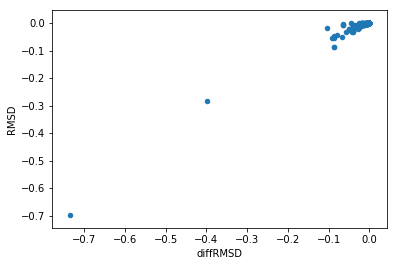

In [285]:
raw_data.plot.scatter("diffRMSD", "RMSD")

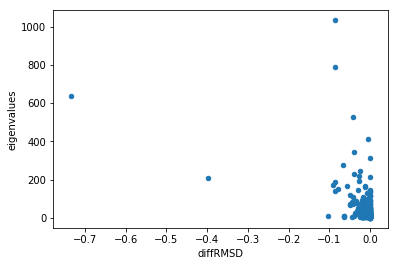

In [263]:
raw_data.plot.scatter("diffRMSD", "eigenvalues")

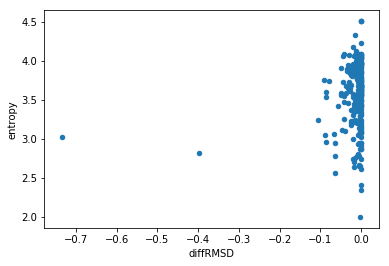

In [265]:
raw_data.plot.scatter("diffRMSD", "entropy")

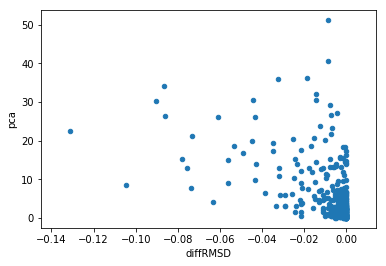

In [261]:
raw_data.plot.scatter("diffRMSD", "pca")

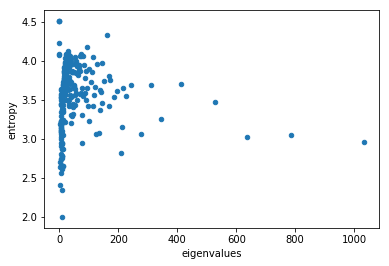

In [209]:
raw_data.plot.scatter("eigenvalues", "entropy")

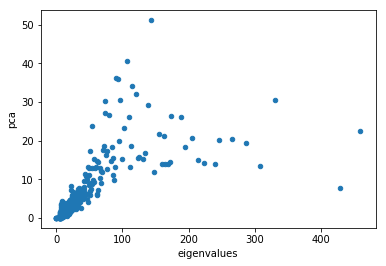

In [260]:
raw_data.plot.scatter("eigenvalues", "pca")

In [293]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import PolynomialFeatures
def my_transform(data, label, degree, FEATURES=FEATURES):

    # LABEL = "Qw"
    LABEL = label
    PolynomialDegree = degree

    num_attribs = FEATURES
    cat_attribs = [LABEL]
    num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('std_scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=PolynomialDegree, include_bias=False))
        ])
    cat_pipeline = Pipeline([
            ('selector', DataFrameSelector(cat_attribs))
        ])

    full_pipeline = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline),
            ("cat_pipeline", cat_pipeline),
        ])
    return full_pipeline.fit_transform(data)

In [306]:
# FEATURES = ["eigenvalues", "entropy", "pca"]
# FEATURES = ["eigenvalues", "entropy", "diffRMSD"]
FEATURES = ["eigenvalues", "entropy"]

# FEATURES = ["eigenvalues"]
LABEL = "diffRMSD"
LABEL = "RMSD"
data = my_transform(raw_data, label=LABEL, degree=1, FEATURES=FEATURES)

In [307]:
from sklearn.linear_model import LinearRegression

In [308]:
lin_reg = LinearRegression()
train_y = data[:,-1]
train_set = data[:,:-1]

lin_reg.fit(train_set, train_y)
y_pred = lin_reg.predict(train_set)

mean square error: 0.00157650707685


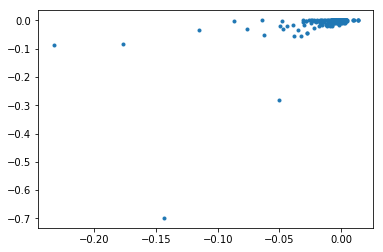

In [309]:
plt.plot(y_pred, train_y, ".")
print("mean square error:", np.sum((train_y-y_pred)**2)/len(y_pred))

mean square error: 0.00211314538652


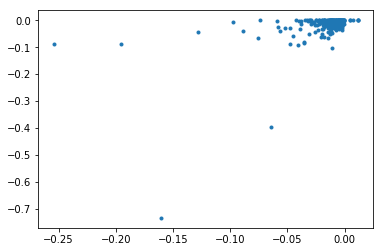

In [303]:
plt.plot(y_pred, train_y, ".")
print("mean square error:", np.sum((train_y-y_pred)**2)/len(y_pred))

In [310]:
cutoff = 10
a = pd.DataFrame(y_pred, columns=["pred"])
a["large"] = a["pred"].rank(method="first") <= cutoff

b = pd.DataFrame(train_y, columns=["train"])
b["gt"] = b["train"].rank(method="first") <= cutoff # ground truth

In [311]:
picked = pd.concat([a,b], axis=1).query("large == True and gt == True")
print("out of the top 10, picked out ", picked.shape[0])

out of the top 10, picked out  5


In [305]:
picked = pd.concat([a,b], axis=1).query("large == True and gt == True")
print("out of the top 10, picked out ", picked.shape[0])

out of the top 10, picked out  5


In [252]:
picked.sum()

pred    -1.596755
large    8.000000
train   -1.629867
gt       8.000000
dtype: float64

In [221]:
pd.concat([a,b], axis=1).sum()

pred     -4.31886
large    10.00000
train    -4.31886
gt       10.00000
dtype: float64

In [194]:
pd.concat([a,b], axis=1).query("large == True")

,pred,large,train,gt
0,-0.757080,True,-0.814549,True
1,-0.399522,True,-0.457784,True
2,-0.323967,True,-0.095139,True
3,-0.237361,True,-0.559770,True
4,-0.188904,True,-0.168058,True
5,-0.174447,True,-0.013000,False
6,-0.152443,True,-0.028691,False
7,-0.141327,True,-0.006070,False
8,-0.110571,True,-0.096960,True
9,-0.097252,True,-0.565082,True


In [195]:
picked.sum()

pred    -2.114658
large    7.000000
train   -2.757341
gt       7.000000
dtype: float64

In [165]:
i = 2
diffRMSD = pd.read_table(f"/Users/weilu/Research/data/refinement_jul27/set{i}/diffRMSD.txt", names=["diffRMSD"], sep="\s+")
eigenvalues = pd.read_table(f"/Users/weilu/Research/data/refinement_jul27/set{i}/eigenvalues.txt", names=["eigenvalues"], sep="\s+")
entropy = pd.read_table(f"/Users/weilu/Research/data/refinement_jul27/set{i}/entropy.txt", names=["entropy"], sep="\s+")
pca = pd.read_table(f"/Users/weilu/Research/data/refinement_jul27/set{i}/std.PCA.txt", names=["pca"], sep="\s+")
raw_data_2 = pd.concat([eigenvalues, entropy, pca, diffRMSD], axis=1)

In [166]:
data_2 = my_transform(raw_data, label=LABEL, degree=1, FEATURES=FEATURES)

In [167]:
test_y = data_2[:,-1]
test_set = data_2[:,:-1]

y_pred = lin_reg.predict(train_set)


In [168]:
data_2

array([[  6.74157155e+00,   1.67029682e-02,  -1.31131000e-01],
       [  6.24683413e+00,  -4.61862619e+00,  -7.36925000e-02],
       [  4.63557806e+00,  -3.54300231e-01,  -4.41102000e-02],
       [  4.28502428e+00,  -1.91024887e+00,  -4.68995000e-03],
       [  3.92727394e+00,   1.08402967e+00,  -3.46758000e-02],
       [  3.58305324e+00,   9.74195694e-01,  -2.50843000e-02],
       [  3.26352572e+00,   2.06149694e-01,  -1.01665000e-02],
       [  3.18244367e+00,   3.88927742e-01,  -6.82601000e-05],
       [  2.91077060e+00,   4.19328449e-01,  -9.05235000e-05],
       [  2.76889872e+00,   7.60120407e-02,  -5.62739000e-02],
       [  2.62258098e+00,   1.23791533e+00,  -1.53555000e-02],
       [  2.43144532e+00,  -9.26596297e-02,  -6.22972000e-04],
       [  2.34912812e+00,   1.44628764e+00,  -4.32242000e-02],
       [  2.08882973e+00,   2.72636079e-01,  -8.62511000e-02],
       [  2.07284963e+00,   5.23852719e-01,  -5.44797000e-04],
       [  2.03651007e+00,  -9.45072730e-02,  -4.2956600